# An example of linear regression with one variable

We'll use the example of the price of cars based on the number of miles on the odometer, as well as its model, like in the stats videos.

First, we'll create a Car class to store the information for a single vehicle.

In [49]:
class Car:
    # This tracks the number of miles
    # on the odometer.
    _mi = 0

    # This tracks the list price of the car.
    _price = 0

    # Initialization constructor.
    def __init__(self, set_mi, set_price):
        self._mi = set_mi
        self._price = set_price
        return

    # Getters
    def get_mi(self):
        return self._mi

    def get_price(self):
        return self._price

We'll need to import numpy to perform matrix operations and matplotlib to show our results as a graph.
We'll also use csv to load the data from a file.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Next, we need to read in the CSV file and store it as a 2d numpy array (a matrix).


In [51]:
# Taken from the following link:
# https://stackoverflow.com/questions/4315506/load-csv-into-2d-matrix-with-numpy-for-plotting?rq=1

reader = csv.reader(open("cars.csv"), delimiter=",")
car_list = list(reader)

cars = []

# Col 0 of the CSV contains the miles
# Col 1 of the CSV contains the price

for row in car_list:
    cars.append(Car(int(row[0]), int(row[1])))

To run a linear regression, we first need to find the least squares solution to the matrix equation Ax = b.

We'll use a line of the form y = mx + p to model our relationship.

In this case, A will contain 1 in the first column (to find the constant term) and the number of miles in the second column.
Our output vector b will simply contain the price of the car.

In [52]:
a = []
b = []

for car in cars:
    a.append(np.array([1, car.get_mi()]))
    b.append(car.get_price())

a = np.array(a)
b = np.array(b)

We can now find the least squares solution to the system.

In [56]:
# lstsq returns a lot of things, but we only need the system solution
x = np.linalg.lstsq(a, b, rcond=None)[0]

slope = x[1]
intercept = x[0]

print("Line of best fit: y = " + str(slope) + "x + " + str(intercept))

Line of best fit: y = -3.024380400888779x + 174221.7910244649


Next, let's plot our data points and the line of best fit.

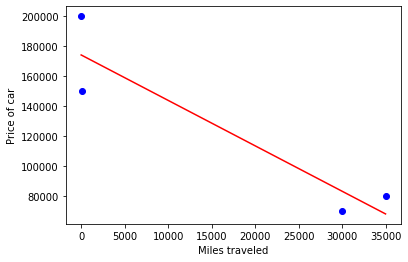

In [54]:
plt.xlabel("Miles traveled")
plt.ylabel("Price of car")

plt.scatter(a[:,[1]], b, color ="blue")

largest_mi = max(car.get_mi() for car in cars)

plt.plot([0, largest_mi], [intercept, (largest_mi * slope) + intercept], color="red")

plt.show()

Finally, let's compute the R<sup>2</sup> value for this regression.

In [55]:
avg = np.mean(b)

ssr = 0
sst = 0

for car in cars:
    best_fit_prediction = intercept + (car.get_mi() * slope)

    ssr += (best_fit_prediction - avg) ** 2
    sst += (car.get_price() - avg) ** 2

r_squared = ssr/sst
print("R^2 = " + str(r_squared))

R^2 = 0.8624837028198311


The R<sup>2</sup> value is very high, meaning that the mileage and price of a car are likely correlated.